# sx.draft.ipynb
Notebook for testing.

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem

mol_fpath = "./Inputs/Dev/RenamedPDBBind/1ebw_762_BEI.mol2"
mol_to_fpath = "./Inputs/Dev/RenamedPDBBind/1ebw_762_BEI_rdkit.mol2"

In [ ]:
Chem.MolFromMol

In [5]:
from rdkit import Chem
import os

def sx_ligand_dedocking(fpath: str, generate_3D_conf = False, random_seed = 10):
    ftype = os.path.splitext(os.path.split(fpath)[1])[1]
    if ftype == ".mol2":
        mol = Chem.MolFromMol2File(fpath)
    elif ftype == ".mol":
        mol = Chem.MolFromMolFile(fpath)
        
    if generate_3D_conf:
        mol = Chem.MolFromMol2File(mol_fpath)
        mol = AllChem.AddHs(mol)
        AllChem.EmbedMultipleConfs(mol, numConfs=1, randomSeed=random_seed)
        mol = AllChem.RemoveHs(mol_Hs)
    else:
        mol.RemoveAllConformers()
    return mol

In [36]:
from rdkit import Chem
from rdkit.Chem import AllChem

mol_fpath = "../../data/HBLigands/ligand/1a0f_ligand.pdb"
mol = Chem.MolFromPDBFile(mol_fpath)

#molhs = AllChem.AddHs(mol)

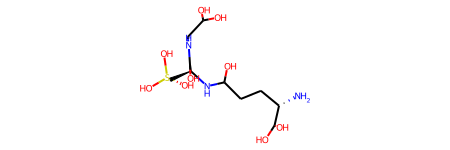

In [37]:
mol

In [27]:
AllChem.EmbedMultipleConfs(molhs)

[06:14:59] UFFTYPER: Unrecognized atom type: S_5+4 (6)


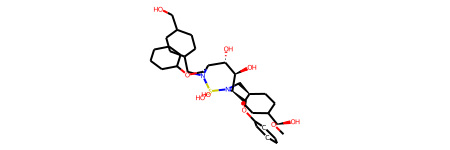

In [52]:
ligand_mol = Chem.MolFromPDBFile("../../data/HBLigands/ligand/1g35_ligand.pdb")
ligand_mol
s = Chem.MolToSmiles(Chem.MolFromSmiles(Chem.MolToSmiles(ligand_mol)))
#

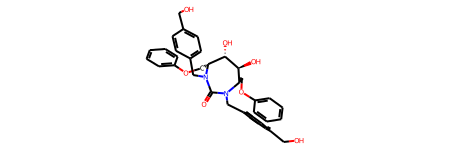

In [53]:
pdb_mol = Chem.MolFromMol2File("../../data1g35_ligand_a008_776_dock.mol2")
pdb_mol
#s_pdb = Chem.MolToSmiles(Chem.MolFromSmiles(Chem.MolToSmiles(pdb_mol)))
#s_pdb

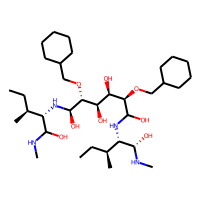

In [38]:
import numpy as np
a,b = read_ligand_position("../../data/HBLigands/ligand/1ebw_ligand.pdb")
b

In [34]:
from oddt import toolkit
def read_ligand_position(ligand_pdb_path):
    #if not os.path.isfile(ligand_pdb_path):
        #logger.error(ligand_pdb_path)
        #raise Exception
    # ligand = mt.load(ligand_pdb_path)
    # top = ligand.topology
    # table, bond = top.to_dataframe()
    # self.ligand_position_array=ligand.xyz[0]*10 #nm->A  #包含氢
    # self.ligand_atom_info_table=table  #serial name element  resSeq resName
    #

    try:
        ligand_mol = AllChem.MolFromPDBFile(ligand_pdb_path)
    except:
        ligand_mol=None
    #self.oddt_ligand=self.read_template(ligand_mol)
    oddt_ligand=toolkit.Molecule(ligand_mol)#不使用模板


    #self.oddt_ligand.protein = True#加上这项 oddt会自动计算残基信息，即使分子不是蛋白质也没关系  ? 2022.02.23:前面的这个注释是错误的
    sligand_position_array = oddt_ligand.atom_dict["coords"]

    ligand_element_array = list(oddt_ligand.atom_dict["atomtype"])
    for i in range(len(ligand_element_array)):
        ligand_element_array[i] = ligand_element_array[i].split(".")[0]

    name_list = []
    for i,atom in enumerate(oddt_ligand.Mol.GetAtoms()):
        try:
            name_list.append(atom.GetMonomerInfo().GetName().strip())
        except:
            name_list.append(ligand_element_array[i])

    ligand_atom_info_table = {"serial": 1 + np.array(range(len(ligand_element_array))),
                                "name": name_list,
                                "element": ligand_element_array,
                                "resSeq": oddt_ligand.atom_dict["resid"],
                                "resName": oddt_ligand.atom_dict["resname"],
                                "hybridization_isacceptor_isdonor_ismetal_ishydrophobe_isaromatic_isminus_isplus":list(zip(
                                        oddt_ligand.atom_dict["hybridization"].astype(np.float64),
                                        oddt_ligand.atom_dict["isacceptor"].astype(np.float64),
                                        oddt_ligand.atom_dict["isdonor"].astype(np.float64),
                                        oddt_ligand.atom_dict["ismetal"].astype(np.float64),
                                        oddt_ligand.atom_dict["ishydrophobe"].astype(np.float64),
                                        oddt_ligand.atom_dict["isaromatic"].astype(np.float64),
                                        oddt_ligand.atom_dict["isminus"].astype(np.float64),
                                        oddt_ligand.atom_dict["isplus"].astype(np.float64)
                                )),
                                "oddt_partial_charge": oddt_ligand.atom_dict["charge"].astype(np.float64)
                                }
    return (ligand_atom_info_table, oddt_ligand)

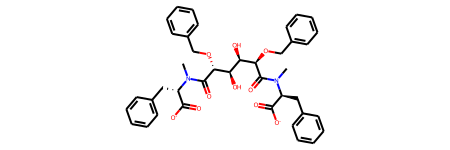

In [6]:
mol = sx_ligand_dedocking("./Inputs/Dev/RenamedPDBBind/1ebw_762_BEI.mol2")
mol

In [8]:
mol.GetAtomWithIdx(0).GetPropsAsDict()["_TriposAtomName"]

'C34'

In [18]:
mol_fpath = "./Inputs/Dev/RenamedPDBBind/1ebw_762_BEI.mol2"
mol = Chem.MolFromMol2File(mol_fpath)
print(mol.GetNumAtoms())
mol_Hs = AllChem.AddHs(mol)
print(mol_Hs.GetNumAtoms())
AllChem.EmbedMultipleConfs(mol_Hs)
mol2 = AllChem.RemoveHs(mol_Hs)
print(mol2.GetNumAtoms())

52
94
52


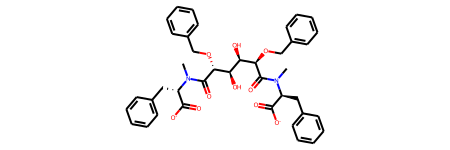

In [23]:
mol2.RemoveAllConformers()
mol2

In [25]:
a = mol2.GetAtomWithIdx(0).GetPropsAsDict()
a

{'_TriposAtomName': 'C34',
 '_TriposAtomType': 'C.ar',
 '_TriposPartialCharge': -0.144,
 '__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE at 0x7f9091d93f90>}

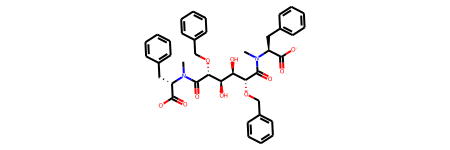

In [4]:
smiles = Chem.MolToSmiles(mol)
mol_rdkit = Chem.MolFromSmiles(smiles)
mol_rdkit

In [5]:
Chem.MolToMolFile(mol_rdkit, mol_to_fpath)

In [1]:
import pandas as pd
nci_fpath = "../../data/ExptNCI/merged_0304.csv"
nci_data = pd.read_csv(nci_fpath)

12598

['1d4h',
 '1d4i',
 '1df8',
 '1ebw',
 '1eby',
 '1ec1',
 '1ec2',
 '1g2k',
 '1g35',
 '1q83',
 '1q84',
 '1r4w',
 '1ryf',
 '1ryh',
 '1t31',
 '1t32',
 '1tpz',
 '1tq4',
 '1uwf',
 '1x70',
 '2b17',
 '2baj',
 '2bak',
 '2e27',
 '2hzy',
 '2oiq',
 '2rgu',
 '2uwd',
 '2v58',
 '2v59',
 '2vci',
 '2wjg',
 '2wji',
 '2wzy',
 '2x00',
 '2x4z',
 '2xbv',
 '2xp2',
 '2xui',
 '2yis',
 '2yiw',
 '2yix',
 '2yki',
 '2zsc',
 '3c79',
 '3c84',
 '3ckz',
 '3cl0',
 '3d7z',
 '3d83',
 '3ekv',
 '3f3v',
 '3fqk',
 '3fql',
 '3gcp',
 '3gcq',
 '3gcv',
 '3hec',
 '3heg',
 '3hkw',
 '3hky',
 '3krd',
 '3krr',
 '3ldp',
 '3miy',
 '3mj1',
 '3mj2',
 '3orn',
 '3p3r',
 '3p8n',
 '3p8o',
 '3pcu',
 '3pwh',
 '3q6w',
 '3q72',
 '3qkd',
 '3qri',
 '3qrj',
 '3smq',
 '3t2v',
 '3uil',
 '3umq',
 '3usx',
 '3utu',
 '3uvq',
 '3vjk',
 '4acd',
 '4acg',
 '4ach',
 '4aqh',
 '4b7j',
 '4b7n',
 '4b7q',
 '4b7r',
 '4bae',
 '4btk',
 '4btm',
 '4c1t',
 '4cbt',
 '4cfe',
 '4crl',
 '4dru',
 '4ekg',
 '4f6u',
 '4f6w',
 '4f7j',
 '4f7l',
 '4f7n',
 '4fcq',
 '4fnn',
 '4g8r',
 

In [23]:
names = [l+"_ligand.pdb" for l in out]

In [ ]:
import shutil
for i in names:
    shutil.copy(f"../../data/ligand/{i}", "../../data/NCILigands/")